# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.linear_model import LogisticRegression
from interpret import show
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)

# from google.colab import drive
# import os
# drive.mount('/content/gdrive', force_remount=True)
# os.chdir('/content/gdrive/MyDrive/Lucas_Thimoteo/')

In [2]:
os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_training/')
from ensemble_train import *

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_explanation/')
from ensemble_explanation import show_feature_weights

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/')
from ensemble_evaluation import compare_ensembles_rocs_on_dataset,calculate_rocs_on_datasets,calculate_metrics_on_datasets,calculate_experiment_performance_on_datasets


In [3]:
os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/data_preprocessing')
from ensemble_preprocessing import execute_ensemble_preprocessing

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/data_preparation')
from ensemble_preparation import execute_ensemble_preparation

# Ensemble Experiments

In [4]:

# mri_data_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_MCI_VGG19_BN_1125.csv'
# cognitive_data_predictions_final_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_MCI_COG_TESTS_1125.csv'

mri_data_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_AD_VGG19_BN.csv'
cognitive_data_predictions_final_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_AD_COG_TESTS.csv'

df_mri = prepare_mri_predictions(mri_data_path)
df_ensemble = prepare_ensemble_experiment_set(cognitive_data_predictions_final_path,mri_data_path)

## Experiment 2 using Features Coronal70, Axial8, Sagittal50

In [7]:
from pycaret.classification import *

In [16]:
df_train,df_validation,_ = get_experiment_sets(df_ensemble,cols_to_drop = ['SUBJECT','DATASET','COGTEST_SCORE'])
label = 'DIAGNOSIS'

exp_pathogen_hemogram = setup(
data = df_train,
test_data=df_validation, 
target = label, 
transformation=True,
transformation_method='quantile',
session_id=1,
experiment_name = '3slices_cnn',
silent=True)

,Description,Value
0,session_id,1
1,Target,DIAGNOSIS
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(709, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
# selected_models = ['lr','rbfsvm','rf']
top5 = compare_models(sort='AUC',n_select = 5,turbo=True,cross_validation = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8699,0.8949,0.5479,0.7692,0.6400,0.5634,0.5754,0.3100
et,Extra Trees Classifier,0.8324,0.8753,0.7671,0.5773,0.6588,0.5506,0.5604,0.2000
qda,Quadratic Discriminant Analysis,0.8150,0.8621,0.1370,0.9091,0.2381,0.1935,0.3100,0.0000
lda,Linear Discriminant Analysis,0.7197,0.8610,0.8219,0.4167,0.5530,0.3791,0.4256,0.0000
nb,Naive Bayes,0.7746,0.8606,0.7945,0.4793,0.5979,0.4543,0.4823,0.0000
lightgbm,Light Gradient Boosting Machine,0.8382,0.8577,0.5342,0.6393,0.5821,0.4827,0.4857,0.0200
lr,Logistic Regression,0.8295,0.8571,0.2055,0.9375,0.3371,0.2827,0.3921,0.0100
gbc,Gradient Boosting Classifier,0.8497,0.8478,0.4110,0.7692,0.5357,0.4557,0.4877,0.1000
knn,K Neighbors Classifier,0.8324,0.8236,0.7397,0.5806,0.6506,0.5424,0.5493,0.0000
svm,SVM - Linear Kernel,0.8353,0.8103,0.7671,0.5833,0.6627,0.5564,0.5655,0.0000


In [10]:
# from sklearn.model_selection import ParameterGrid
# param_grid = {'a': [1, 2], 'b': [True, False]}
# list(ParameterGrid(param_grid))

# params = {
#     'C' : [0.1,1,10,100],
#     'penalty' : ['l2', 'elasticnet'],
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'class_weight':[None,'balanced']
# }

# model = LogisticRegression()

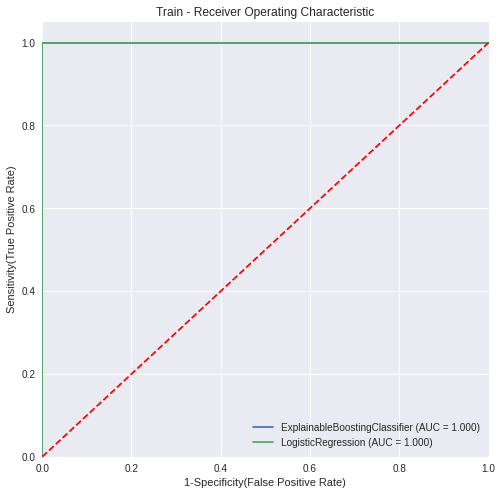

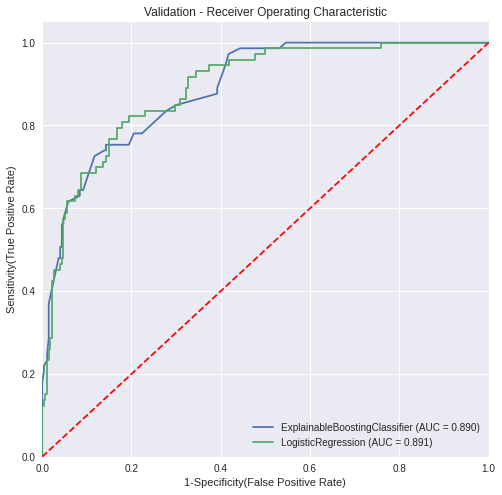

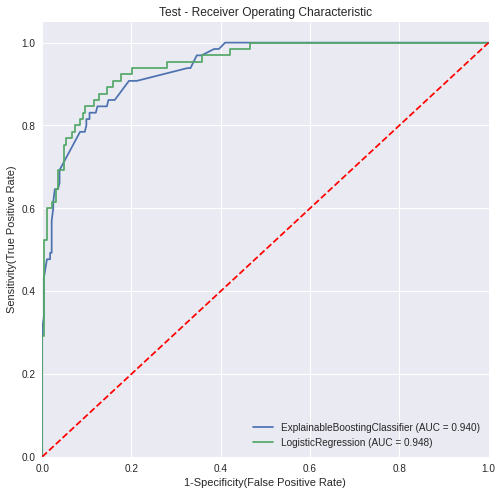


ExplainableBoostingClassifier Results for Train:
Optimal Threshold: 0.9998
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------
LogisticRegression Results for Train:
Optimal Threshold: 0.9456
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------

---------------------------------------
ExplainableBoostingClassifier Results for Validation:
Optimal Threshold: 0.0141
----------------
Total samples in batch: (346,)
AUC:       0.890
Accuracy:  0.835
F1:        0.659
Precision: 0.585
Recall:    0.753
Confusion Matrix: 
 [[234  39]
 [ 18  55]]
----------------
LogisticRegression Results for Validation:
Optimal Threshold: 0.0768
----------------
Total samples in batch: (346,)
AUC:       0.891
Accuracy:  0.818
F1:      

In [20]:
# df_train,df_validation,df_test = get_experiment_sets(df_ensemble,cols_to_drop = ['SUBJECT','DATASET','COGTEST_SCORE'])

# datasets=[df_train,df_validation,df_test]
# label = 'DIAGNOSIS'
# ebm,lr = ExplainableBoostingClassifier(),LogisticRegression()
# models = [ebm,lr]

# models = train_ensemble_models(df_train,label,models)
# df_rocs_cnn3slices = calculate_experiment_performance_on_datasets(models,datasets,label)


In [21]:
model_col = 'CNN_3Slices_EBM'
y_pred_proba = ebm.predict_proba(df_ensemble.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1).fillna(0))[:,-1]
df_compare[model_col] = y_pred_proba

model_col = 'CNN_3Slices_LR'
y_pred_proba = lr.predict_proba(df_ensemble.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1).fillna(0))[:,-1]
df_compare[model_col] = y_pred_proba

model = lr
model_col = 'CNN_3Slices'
y_pred_proba = model.predict_proba(df_ensemble.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1).fillna(0))[:,-1]
df_compare[model_col] = y_pred_proba

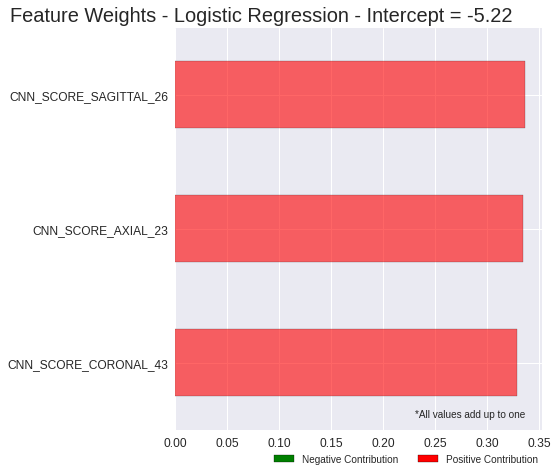

In [22]:
features = df_test.columns[:-1]
show_feature_weights(features,lr.coef_.ravel(),'Logistic Regression - Intercept = %3.2f' % lr.intercept_[0], color = ('r','g'),figsize=(6,6), absolute_values = False,normalized=True)

In [23]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140630595599376/ -->

In [24]:
ebm_local = ebm.explain_local(df_test.drop('DIAGNOSIS',axis=1),df_test['DIAGNOSIS'])
show(ebm_local)

<!-- http://127.0.0.1:7001/140629913657248/ -->

## Experiment 3 using Features Coronal70, Axial8, Sagittal50 + Demographics

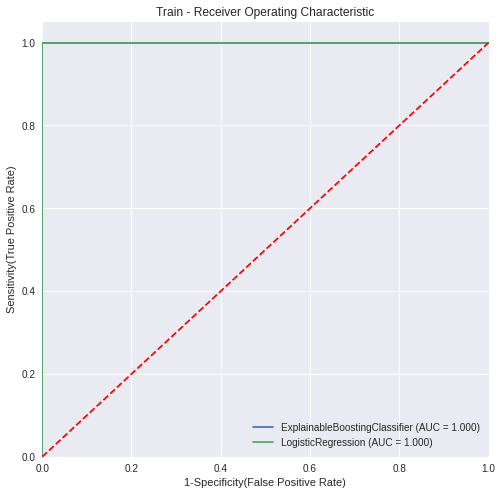

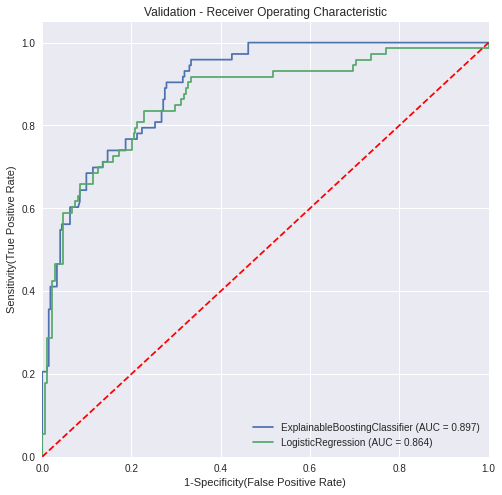

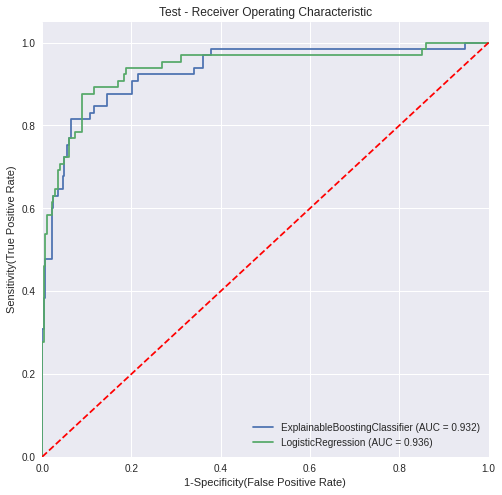


ExplainableBoostingClassifier Results for Train:
Optimal Threshold: 1.0000
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------
LogisticRegression Results for Train:
Optimal Threshold: 0.9525
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------

---------------------------------------
ExplainableBoostingClassifier Results for Validation:
Optimal Threshold: 0.0000
----------------
Total samples in batch: (346,)
AUC:       0.897
Accuracy:  0.760
F1:        0.614
Precision: 0.465
Recall:    0.904
Confusion Matrix: 
 [[197  76]
 [  7  66]]
----------------
LogisticRegression Results for Validation:
Optimal Threshold: 0.0487
----------------
Total samples in batch: (346,)
AUC:       0.864
Accuracy:  0.786
F1:      

In [25]:
demographic_cols = ['AGE','MALE',
                    'YEARS_EDUCATION','HISPANIC',
                    'RACE_WHITE', 'RACE_BLACK', 'RACE_ASIAN', 'WIDOWED']
df_cog_final = pd.read_csv(cognitive_data_predictions_final_path).set_index("IMAGE_DATA_ID")
df_ensemble_demographics = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True)

df_train,df_validation,df_test = get_experiment_sets(df_ensemble_demographics,cols_to_drop = ['SUBJECT','DATASET','COGTEST_SCORE'])

datasets=[df_train,df_validation,df_test]
label = 'DIAGNOSIS'
ebm,lr = ExplainableBoostingClassifier(),LogisticRegression(max_iter=1000)
models = [ebm,lr]

models = train_ensemble_models(df_train,label,models)
df_rocs_cnn3slices_demographics = calculate_experiment_performance_on_datasets(models,datasets,label)

In [26]:
df_predict = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True).fillna(0).sort_index()

model_col = 'CNN_3Slices_Demographics_EBM'
y_pred_proba = ebm.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

model_col = 'CNN_3Slices_Demographics_LR'
y_pred_proba = lr.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

model = ebm
model_col = 'CNN_3Slices_Demographics'
y_pred_proba = model.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba


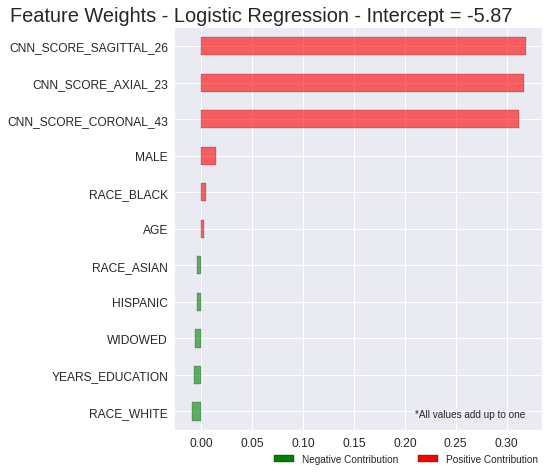

In [27]:
features = df_test.columns[:-1]
show_feature_weights(features,lr.coef_.ravel(),'Logistic Regression - Intercept = %3.2f' % lr.intercept_[0], color = ('r','g'),figsize=(6,6), absolute_values = False,normalized=True)

In [28]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140630593161296/ -->

In [29]:
ebm_local = ebm.explain_local(df_test.drop('DIAGNOSIS',axis=1),df_test['DIAGNOSIS'])
show(ebm_local)

<!-- http://127.0.0.1:7001/140630596867312/ -->

## Experiment 4 - Features Coronal70, Axial8, Sagittal50 + Demographics + CDRSB

/home/lucas/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


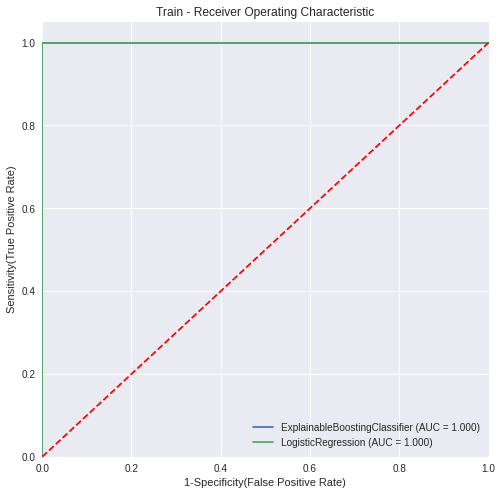

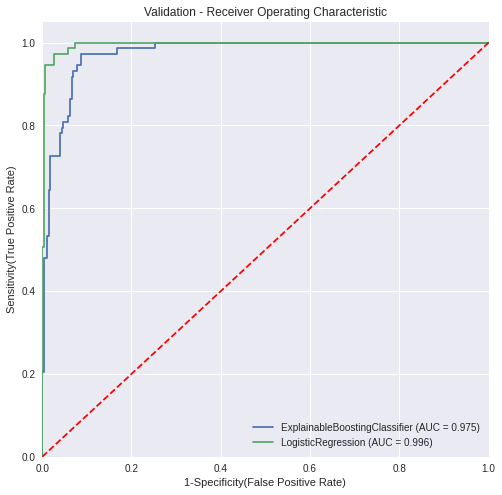

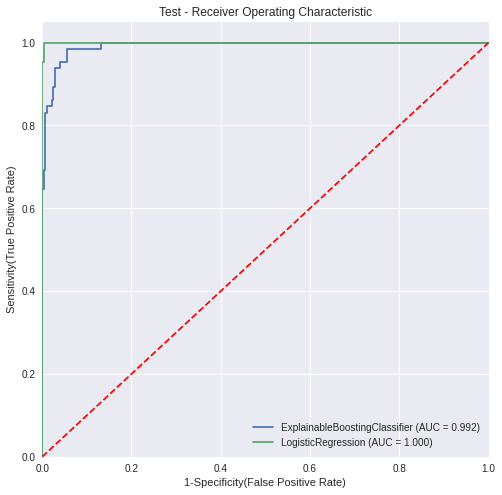


ExplainableBoostingClassifier Results for Train:
Optimal Threshold: 1.0000
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------
LogisticRegression Results for Train:
Optimal Threshold: 0.7460
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  1.000
F1:        1.000
Precision: 1.000
Recall:    1.000
Confusion Matrix: 
 [[554   0]
 [  0 155]]
----------------

---------------------------------------
ExplainableBoostingClassifier Results for Validation:
Optimal Threshold: 0.0002
----------------
Total samples in batch: (346,)
AUC:       0.975
Accuracy:  0.925
F1:        0.845
Precision: 0.747
Recall:    0.973
Confusion Matrix: 
 [[249  24]
 [  2  71]]
----------------
LogisticRegression Results for Validation:
Optimal Threshold: 0.0672
----------------
Total samples in batch: (346,)
AUC:       0.996
Accuracy:  0.974
F1:      

In [30]:
demographic_cols = ['AGE','MALE',
                    'YEARS_EDUCATION','HISPANIC','CDRSB',
                    'RACE_WHITE', 'RACE_BLACK', 'RACE_ASIAN', 'WIDOWED']
df_cog_final = pd.read_csv(cognitive_data_predictions_final_path).set_index("IMAGE_DATA_ID")
df_ensemble_demographics = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True)

df_train,df_validation,df_test = get_experiment_sets(df_ensemble_demographics,cols_to_drop = ['SUBJECT','DATASET','COGTEST_SCORE'])

datasets=[df_train,df_validation,df_test]
label = 'DIAGNOSIS'
ebm,lr = ExplainableBoostingClassifier(),LogisticRegression()
models = [ebm,lr]

models = train_ensemble_models(df_train,label,models)
df_rocs_cnn3slices_demographics_cdrsb = calculate_experiment_performance_on_datasets(models,datasets,label)

In [31]:
df_predict = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True).fillna(0).sort_index()

model_col = 'CNN_3Slices_Demographics_CDRSB_EBM'
y_pred_proba = ebm.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

model_col = 'CNN_3Slices_Demographics_CDRSB_LR'
y_pred_proba = lr.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

model = lr
model_col = 'CNN_3Slices_Demographics_CDRSB'
y_pred_proba = model.predict_proba(df_predict.drop(['SUBJECT','DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

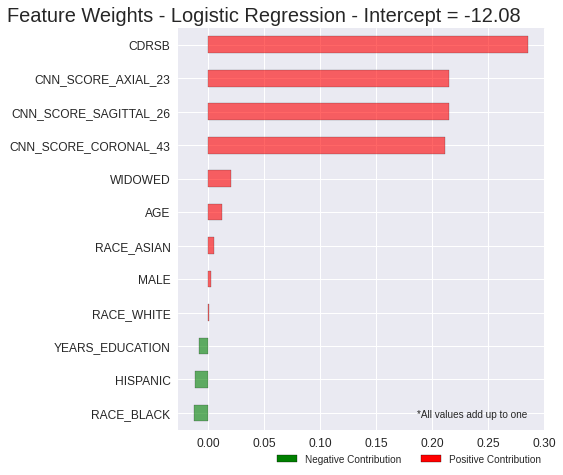

In [32]:
features = df_test.columns[:-1]
show_feature_weights(features,lr.coef_.ravel(),'Logistic Regression - Intercept = %3.2f' % lr.intercept_[0], color = ('r','g'),figsize=(6,6), absolute_values = False,normalized=True)

In [33]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140629941382352/ -->

In [34]:
ebm_local = ebm.explain_local(df_test.drop('DIAGNOSIS',axis=1),df_test['DIAGNOSIS'])
show(ebm_local)

<!-- http://127.0.0.1:7001/140629940922160/ -->

## Experiment 5 Bonus - Just CDRSB

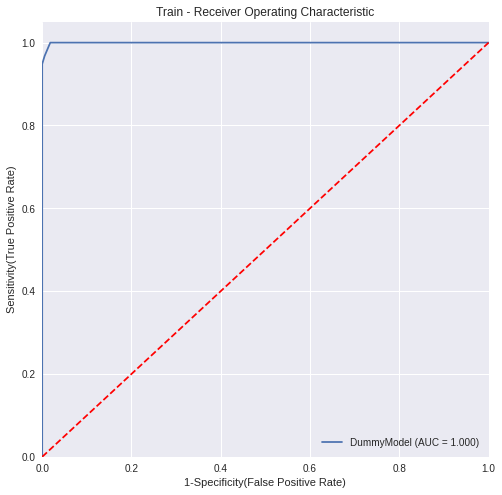

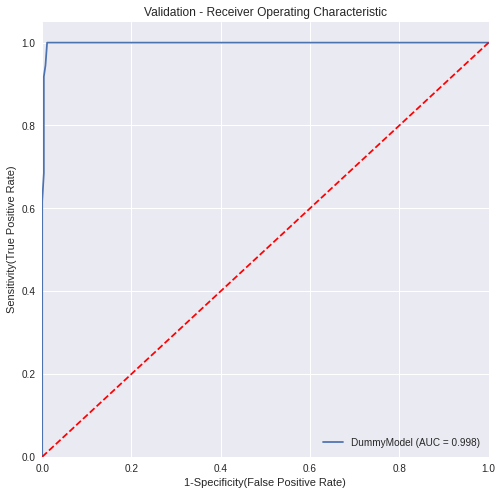

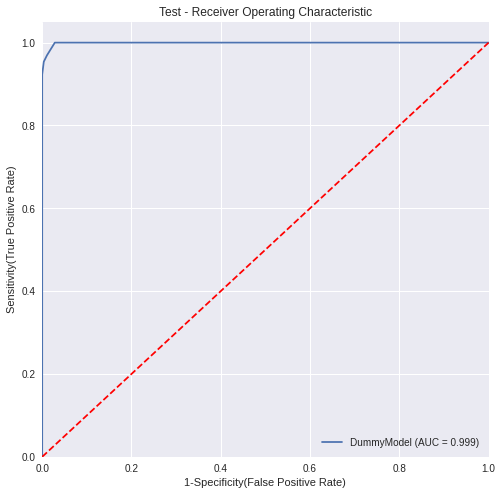


DummyModel Results for Train:
Optimal Threshold: 1.5000
----------------
Total samples in batch: (709,)
AUC:       1.000
Accuracy:  0.986
F1:        0.969
Precision: 0.939
Recall:    1.000
Confusion Matrix: 
 [[544  10]
 [  0 155]]
----------------

---------------------------------------
DummyModel Results for Validation:
Optimal Threshold: 1.5000
----------------
Total samples in batch: (346,)
AUC:       0.998
Accuracy:  0.991
F1:        0.980
Precision: 0.961
Recall:    1.000
Confusion Matrix: 
 [[270   3]
 [  0  73]]
----------------

---------------------------------------
DummyModel Results for Test:
Optimal Threshold: 1.5000
----------------
Total samples in batch: (348,)
AUC:       0.999
Accuracy:  0.986
F1:        0.962
Precision: 0.955
Recall:    0.969
Confusion Matrix: 
 [[280   3]
 [  2  63]]
----------------

---------------------------------------


In [35]:
demographic_cols = ['CDRSB']

df_cog_final = pd.read_csv(cognitive_data_predictions_final_path).set_index("IMAGE_DATA_ID")
df_ensemble_demographics = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True)

df_train,df_validation,df_test = get_experiment_sets(df_ensemble_demographics,cols_to_drop = ['DATASET','COGTEST_SCORE'])

datasets=[df_train,df_validation,df_test]
label = 'DIAGNOSIS'
ebm,lr = ExplainableBoostingClassifier(),LogisticRegression()
models=[DummyModel(slice='CDRSB')]

models = train_ensemble_models(df_train,label,models)
df_rocs_cdrsb = calculate_experiment_performance_on_datasets(models,datasets,label)

In [36]:
model = DummyModel(slice='CDRSB')
model_col = 'CDRSB'

df_predict = df_cog_final[demographic_cols].merge(df_ensemble,right_index=True,left_index=True).fillna(0).sort_index()
y_pred_proba = model.predict_proba(df_predict.drop(['DATASET','DIAGNOSIS','COGTEST_SCORE'],axis=1))[:,-1]
df_compare[model_col] = y_pred_proba

In [37]:
df_compare.to_csv('/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_AD_ALL_SCORES_ENSEMBLE.csv')

# Compare All Experiments
  1. CNN Coronal
  2. CNN Axial
  3. CNN Sagittal
  4. Ensemble CNNs
  5. Ensemble CNNs + CogTest Score
  6. Ensemble CNNs + Demographics
  7. Ensemble CNNs + Demographics + CDRSB
  8. CDRSB

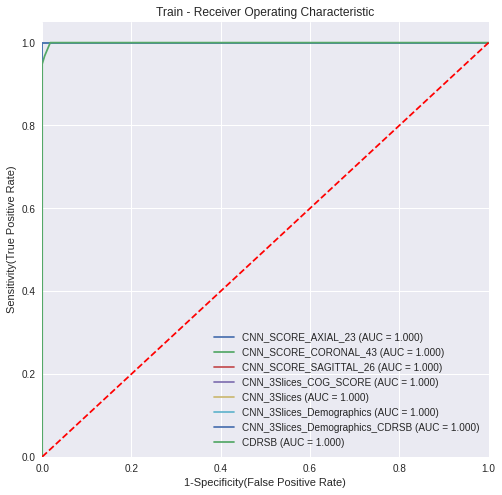

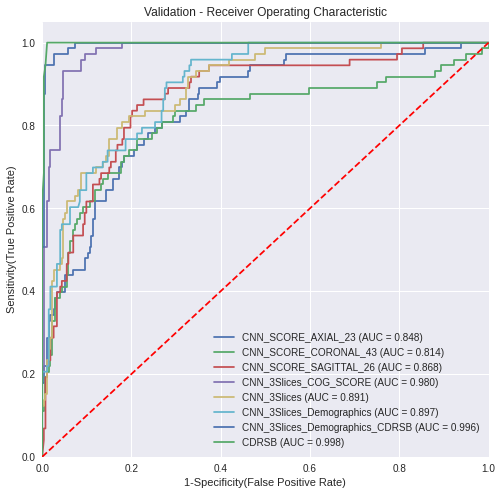

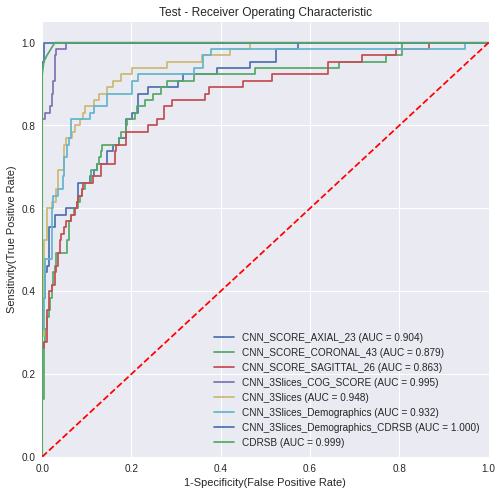

In [38]:
df_compare = pd.read_csv('/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_AD_ALL_SCORES_ENSEMBLE.csv')
datasets = [df_compare.query("DATASET == 'train'"),
            df_compare.query("DATASET == 'validation'"),
            df_compare.query("DATASET == 'test'")]

            
models = ['CNN_SCORE_AXIAL_23','CNN_SCORE_CORONAL_43', 'CNN_SCORE_SAGITTAL_26',
       'CNN_3Slices_COG_SCORE', 'CNN_3Slices', 'CNN_3Slices_Demographics',
       'CNN_3Slices_Demographics_CDRSB', 'CDRSB']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS')

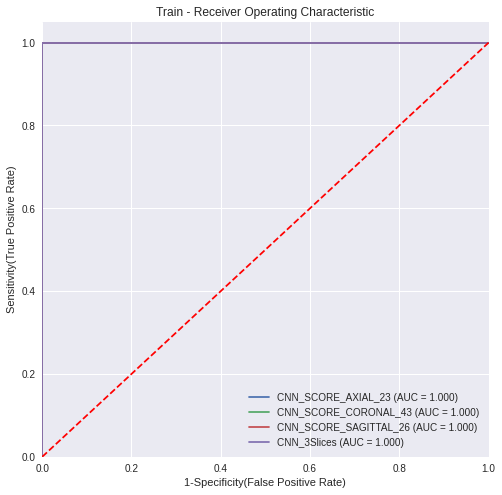

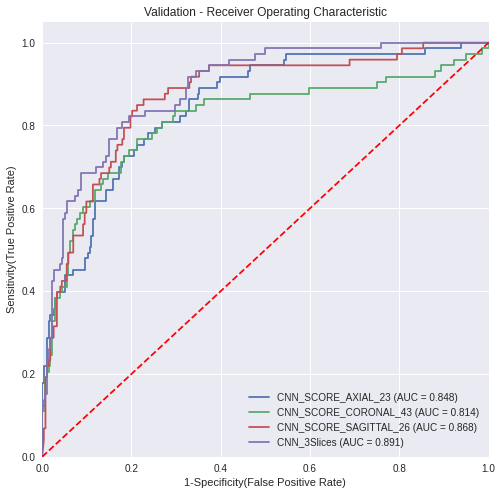

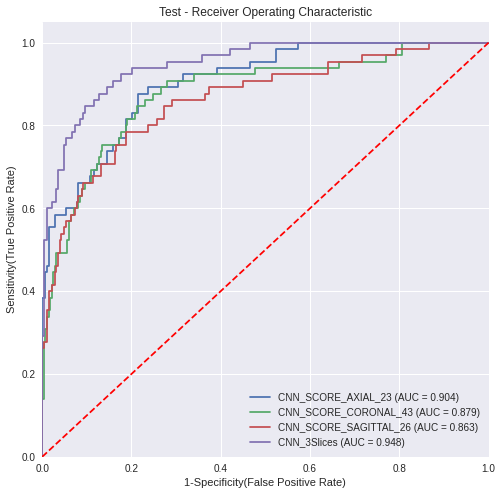

In [39]:
models = ['CNN_SCORE_AXIAL_23','CNN_SCORE_CORONAL_43', 'CNN_SCORE_SAGITTAL_26',
       'CNN_3Slices']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='DIAGNOSIS')
# compare_ensembles_rocs_on_dataset(df_compare.query("DATASET == 'test'"),'DIAGNOSIS',models)

In [40]:
df_compare.isna().sum()

IMAGE_DATA_ID                         0
SUBJECT                               0
DATASET                               0
CNN_SCORE_AXIAL_23                    0
CNN_SCORE_CORONAL_43                  0
CNN_SCORE_SAGITTAL_26                 0
COGTEST_SCORE                         0
DIAGNOSIS                             0
CNN_3Slices_COG_SCORE_EBM             0
CNN_3Slices_COG_SCORE_LR              0
CNN_3Slices_COG_SCORE                 0
CNN_3Slices_EBM                       0
CNN_3Slices_LR                        0
CNN_3Slices                           0
CNN_3Slices_Demographics_EBM          0
CNN_3Slices_Demographics_LR           0
CNN_3Slices_Demographics              0
CNN_3Slices_Demographics_CDRSB_EBM    0
CNN_3Slices_Demographics_CDRSB_LR     0
CNN_3Slices_Demographics_CDRSB        0
CDRSB                                 0
dtype: int64